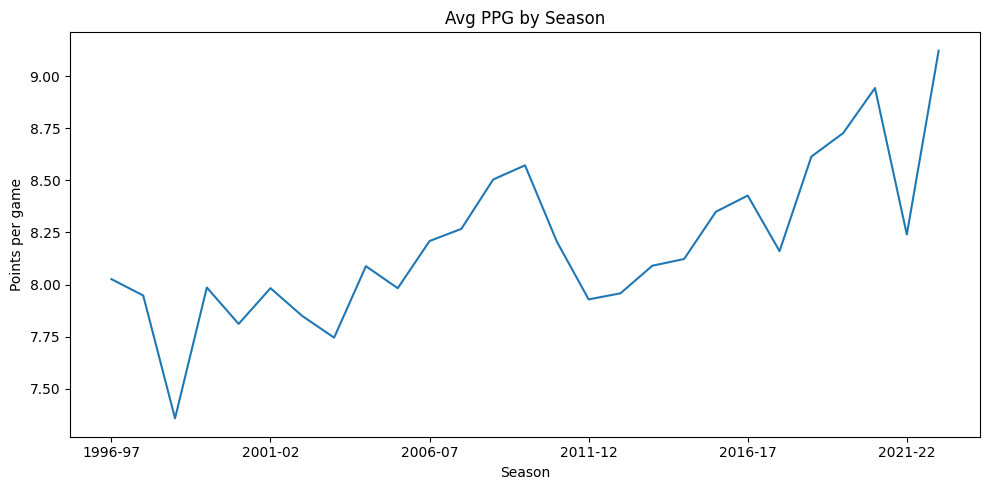

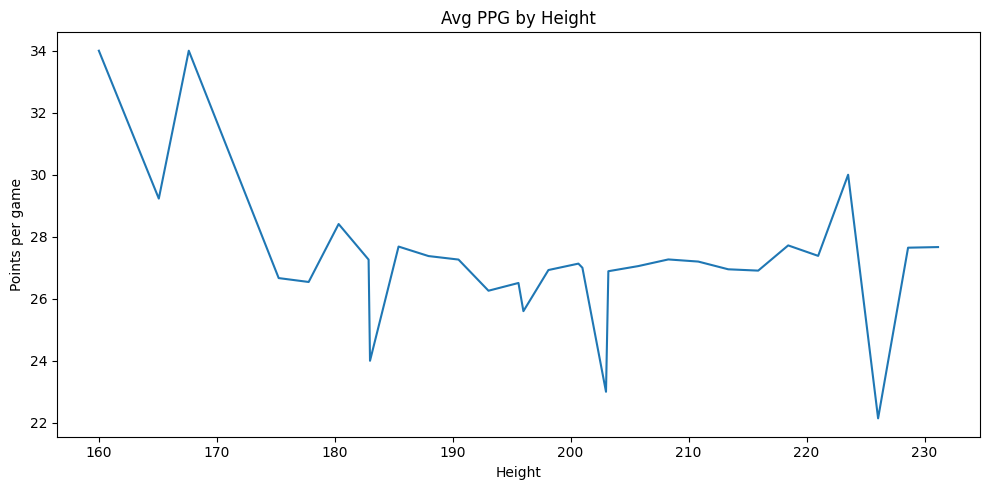

In [7]:
# Data Analysis w/ Pandas & Matplot (maybe numpy) on NBA players Dataframe

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

nba = pd.read_csv("/kaggle/input/nba-players-data/all_seasons.csv")

# Average ppg across every season 
avg_ppg_by_season = nba.groupby("season")['pts'].mean()

plt.figure(figsize=(10,5))
graph1 = avg_ppg_by_season.plot()
graph1.set_xlabel('Season')
graph1.set_ylabel('Points per game')
plt.title("Avg PPG by Season")
plt.tight_layout()

# Average ppg by height (Graph #2)
avg_ppg_by_height = nba.groupby("player_height")['age'].mean()

plt.figure(figsize=(10,5))
graph2 = avg_ppg_by_height.plot()
graph2.set_xlabel('Height')
graph2.set_ylabel('Points per game')
plt.title("Avg PPG by Height")
plt.tight_layout()


